First we show the code used, and at the end we show the results and its analysis and conclusions.

In [3]:
# General import and load data
import pandas as pd
import numpy as np

from pandas import Series, DataFrame

# Training and test spliting
from sklearn.cross_validation import train_test_split
from sklearn import preprocessing

# Estimators
from sklearn.svm import SVC

# Evaluation
from sklearn import metrics
from sklearn.cross_validation import cross_val_score, KFold, StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# Optimization
from sklearn.grid_search import GridSearchCV

# if matplotlib is not set inline, you will not see plots
#alternatives auto gtk gtk2 inline osx qt qt5 wx tk
#%matplotlib auto
#%matplotlib qt
%matplotlib inline
%run plot_learning_curve

# RBF MODEL

Primero cargamos y limpiamos el modelo

In [4]:
df = pd.read_csv('data-churn/train.csv')

df.loc[df["gender"] == "Male", "gender"] = 0
df.loc[df["gender"] == "Female", "gender"] = 1

df.loc[df["Partner"] == "Yes", "Partner"] = 1
df.loc[df["Partner"] == "No", "Partner"] = 0

df.loc[df["Dependents"] == "Yes", "Dependents"] = 1
df.loc[df["Dependents"] == "No", "Dependents"] = 0

df.loc[df["PhoneService"] == "Yes", "PhoneService"] = 1
df.loc[df["PhoneService"] == "No", "PhoneService"] = 0

df.loc[df["MultipleLines"] == "No", "MultipleLines"] = 0
df.loc[df["MultipleLines"] == "No phone service", "MultipleLines"] = 0
df.loc[df["MultipleLines"] == "Yes", "MultipleLines"] = 1

df.loc[df["InternetService"] == "No", "InternetService"] = 0
df.loc[df["InternetService"] == "DSL", "InternetService"] = 1
df.loc[df["InternetService"] == "Fiber optic", "InternetService"] = 2

df.loc[df["OnlineSecurity"] == "No", "OnlineSecurity"] = 0
df.loc[df["OnlineSecurity"] == "No internet service", "OnlineSecurity"] = 0
df.loc[df["OnlineSecurity"] == "Yes", "OnlineSecurity"] = 1

df.loc[df["OnlineBackup"] == "No", "OnlineBackup"] = 0
df.loc[df["OnlineBackup"] == "No internet service", "OnlineBackup"] = 0
df.loc[df["OnlineBackup"] == "Yes", "OnlineBackup"] = 1

df.loc[df["DeviceProtection"] == "No", "DeviceProtection"] = 0
df.loc[df["DeviceProtection"] == "No internet service", "DeviceProtection"] = 0
df.loc[df["DeviceProtection"] == "Yes", "DeviceProtection"] = 1

df.loc[df["TechSupport"] == "No", "TechSupport"] = 0
df.loc[df["TechSupport"] == "No internet service", "TechSupport"] = 0
df.loc[df["TechSupport"] == "Yes", "TechSupport"] = 1

df.loc[df["StreamingTV"] == "No", "StreamingTV"] = 0
df.loc[df["StreamingTV"] == "No internet service", "StreamingTV"] = 0
df.loc[df["StreamingTV"] == "Yes", "StreamingTV"] = 1

df.loc[df["StreamingMovies"] == "No", "StreamingMovies"] = 0
df.loc[df["StreamingMovies"] == "No internet service", "StreamingMovies"] = 0
df.loc[df["StreamingMovies"] == "Yes", "StreamingMovies"] = 1

df.loc[df["Contract"] == "Two year", "Contract"] = 0
df.loc[df["Contract"] == "One year", "Contract"] = 1
df.loc[df["Contract"] == "Month-to-month", "Contract"] = 2

df.loc[df["PaperlessBilling"] == "Yes", "PaperlessBilling"] = 1
df.loc[df["PaperlessBilling"] == "No", "PaperlessBilling"] = 0

df.loc[df["PaymentMethod"] == "Bank transfer (automatic)", "PaymentMethod"] = 0
df.loc[df["PaymentMethod"] == "Mailed check", "PaymentMethod"] = 1
df.loc[df["PaymentMethod"] == "Electronic check", "PaymentMethod"] = 2
df.loc[df["PaymentMethod"] == "Credit card (automatic)", "PaymentMethod"] = 3

df["TotalCharges"] = df["TotalCharges"].apply(pd.to_numeric, errors='coerce')

df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

In [5]:
#Check types are numeric
df.dtypes

customerID            int64
gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract              int64
PaperlessBilling      int64
PaymentMethod         int64
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

In [6]:
df['gender'] = df['gender'].astype(np.int64)
df['Partner'] = df['Partner'].astype(np.int64)
df['Dependents'] = df['Dependents'].astype(np.int64)
df['PhoneService'] = df['PhoneService'].astype(np.int64)
df['MultipleLines'] = df['MultipleLines'].astype(np.int64)
df['InternetService'] = df['InternetService'].astype(np.int64)
df['OnlineSecurity'] = df['OnlineSecurity'].astype(np.int64)
df['OnlineBackup'] = df['OnlineBackup'].astype(np.int64)
df['DeviceProtection'] = df['DeviceProtection'].astype(np.int64)
df['TechSupport'] = df['TechSupport'].astype(np.int64)
df['StreamingTV'] = df['StreamingTV'].astype(np.int64)
df['StreamingMovies'] = df['StreamingMovies'].astype(np.int64)
df['Contract'] = df['Contract'].astype(np.int64)
df['PaperlessBilling'] = df['PaperlessBilling'].astype(np.int64)
df['PaymentMethod'] = df['PaymentMethod'].astype(np.int64)

In [7]:
#Check types are numeric
df.dtypes

customerID            int64
gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract              int64
PaperlessBilling      int64
PaymentMethod         int64
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

In [8]:
#Check there are not missing values
df.isnull().any()

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

In [9]:
# Features of the model

X = df.drop(['Churn'], axis=1).values
y = df['Churn'].values

# Test set will be the 25% taken randomly
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=33)

# Preprocess: normalize
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Define model

In [10]:
types_of_kernels = ['linear', 'rbf', 'poly']

kernel = types_of_kernels[1]
gamma = 3.0
model = SVC(kernel=kernel, probability=True, gamma=gamma)

# Train and evaluate

In [11]:
#This step will take some time 
# Train - This is not needed if you use K-Fold
model.fit(X_train, y_train)
predicted = model.predict(X_test)
expected = y_test

In [12]:
# Accuracy
metrics.accuracy_score(expected, predicted)

0.7474747474747475

~75% using RBF kernel with normalized data


## Null accuracy

We can evaluate the accuracy if the model always predict the most frequent class, following this [refeference](http://blog.kaggle.com/2015/10/23/scikit-learn-video-9-better-evaluation-of-classification-models/).

In [13]:
# Count number of samples per class
s_y_test = Series(y_test)
s_y_test.value_counts()

0    997
1    389
dtype: int64

In [14]:
# Mean of ones
y_test.mean()

0.28066378066378067

In [15]:
# Mean of zeros
1 - y_test.mean() 

0.7193362193362194

In [16]:
# Calculate null accuracy (binary classification coded as 0/1)
max(y_test.mean(), 1 - y_test.mean())

0.7193362193362194

In [17]:
# Calculate null accuracy (multiclass classification)
s_y_test.value_counts().head(1) / len(y_test)

0    0.719336
dtype: float64

Null accuracy is 71.93% so there is no such a difference between null accuracy and accuracy(75%)

## Confussion matrix and F-score

In [18]:
# Confusion matrix
print(metrics.confusion_matrix(expected, predicted))

[[982  15]
 [335  54]]


In [19]:
# Report
print(classification_report(expected, predicted))

             precision    recall  f1-score   support

          0       0.75      0.98      0.85       997
          1       0.78      0.14      0.24       389

avg / total       0.76      0.75      0.68      1386



## ROC (Receiver Operating Characteristic ) and AUC (Area Under the Curve)

The [ROC](https://en.wikipedia.org/wiki/Receiver_operating_characteristic)  curve illustrates the performance of a binary classifier system as its discrimination threshold is varied.

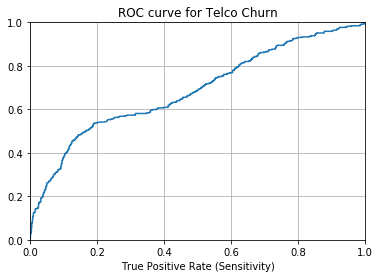

In [20]:
y_pred_prob = model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Telco Churn')
plt.xlabel('False Positive Rate (1 - Recall)')
plt.xlabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [21]:
#Threshold used by the decision function, thresholds[0] is the number of 
thresholds

array([0.85757549, 0.83500973, 0.8334404 , 0.81150351, 0.81136039,
       0.80985325, 0.80873248, 0.79696971, 0.78728072, 0.70149093,
       0.69537405, 0.60791091, 0.6036213 , 0.6027405 , 0.60167925,
       0.58586995, 0.58130916, 0.55206227, 0.549606  , 0.53035006,
       0.52995651, 0.52900729, 0.51353636, 0.5       , 0.47538965,
       0.45449221, 0.45015992, 0.41851162, 0.41601684, 0.4159071 ,
       0.4141433 , 0.40646805, 0.37750635, 0.37609158, 0.36752615,
       0.36416781, 0.36320219, 0.35549128, 0.35500969, 0.34004182,
       0.32749982, 0.3234246 , 0.32004676, 0.30932422, 0.30863105,
       0.30170833, 0.28992002, 0.28780629, 0.28546574, 0.28328965,
       0.28186448, 0.28005826, 0.27514271, 0.27511189, 0.2742036 ,
       0.27416897, 0.27386261, 0.27215384, 0.27182849, 0.27150222,
       0.27100491, 0.27094959, 0.27072221, 0.26998114, 0.26961762,
       0.26915542, 0.2671462 , 0.26621511, 0.26522417, 0.26457893,
       0.264346  , 0.26330738, 0.26213333, 0.2612726 , 0.26120

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000018E8422C978>,
      dtype=object)

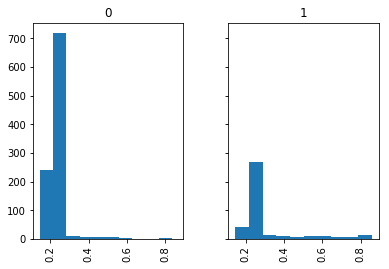

In [22]:
#Histogram of probability vs actual
dprob = pd.DataFrame(data = {'probability':y_pred_prob, 'actual':y_test})
dprob.probability.hist(by=dprob.actual, sharex=True, sharey=True)

ROC curve helps to select a threshold to balance sensitivity and recall.

In [23]:
#Function to evaluate thresholds of the ROC curve
def evaluate_threshold(threshold):
    print('Sensitivity:', tpr[thresholds > threshold][-1])
    print('Recall:', 1 - fpr[thresholds > threshold][-1])

In [24]:
evaluate_threshold(0.75)

Sensitivity: 0.038560411311053984
Recall: 0.995987963891675


In [25]:
evaluate_threshold(0.5)

Sensitivity: 0.12596401028277635
Recall: 0.9849548645937813


By default, the thresdhold to decide a class is 0.5, If we modify it, we should use the new thresdhold.

threshold = 0.75

predicted = model.predict_proba(X) > threshold

In [26]:
# AUX
print(roc_auc_score(expected, predicted))

0.5618861726567879


## Train and Evaluate with K-Fold

In [27]:
# This step will take some time
# Cross-validation
cv = KFold(X.shape[0], n_folds=5, shuffle=False, random_state=33)
# StratifiedKFold has is a variation of k-fold which returns stratified folds:
# each set contains approximately the same percentage of samples of each target class as the complete set.
#cv = StratifiedKFold(y, n_folds=3, shuffle=False, random_state=33)
scores = cross_val_score(model, X, y, cv=cv)
print("Scores in every iteration", scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Scores in every iteration [0.72858431 0.73850316 0.72678088 0.73916968 0.71841155]
Accuracy: 0.73 (+/- 0.02)


<module 'matplotlib.pyplot' from 'C:\\Users\\grego\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

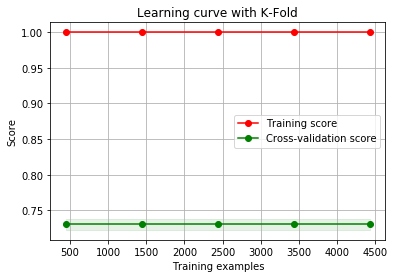

In [28]:
plot_learning_curve(model, "Learning curve with K-Fold", X, y, cv=cv)

# Train and Optimize

In [29]:
#Tune parameters
gammas = np.logspace(-6, -1, 10)
gs = GridSearchCV(model, param_grid=dict(gamma=gammas))
gs.fit(X_train, y_train)
scores = gs.score(X_test, y_test)
print(scores)

0.8044733044733045


<module 'matplotlib.pyplot' from 'C:\\Users\\grego\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

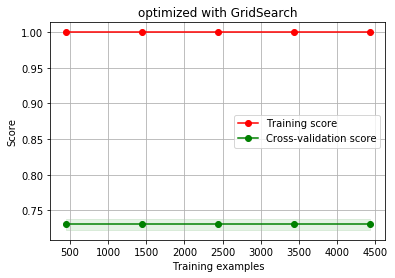

In [30]:
# Refine model
model = SVC(kernel='rbf', gamma=gs.best_estimator_.gamma)
plot_learning_curve(model, "optimized with GridSearch", X, y, cv=cv)

In [31]:
model.fit(X_train, y_train)

predicted = model.predict(X_test)
expected = y_test

In [32]:
# Accuracy
metrics.accuracy_score(expected, predicted)

0.8044733044733045

In [33]:
# AUX
print(roc_auc_score(expected, predicted))

0.7128106685093842


In [34]:
print(classification_report(expected, predicted))
print (f1_score(expected, predicted))

             precision    recall  f1-score   support

          0       0.83      0.92      0.87       997
          1       0.72      0.50      0.59       389

avg / total       0.80      0.80      0.79      1386



NameError: name 'f1_score' is not defined

Se carga el dataset de test

In [ ]:
dfTest = pd.read_csv('data-churn/test_nolabel.csv')

In [ ]:
dfTest.loc[dfTest["gender"] == "Male", "gender"] = 0
dfTest.loc[dfTest["gender"] == "Female", "gender"] = 1

dfTest.loc[dfTest["Partner"] == "Yes", "Partner"] = 1
dfTest.loc[dfTest["Partner"] == "No", "Partner"] = 0

dfTest.loc[dfTest["Dependents"] == "Yes", "Dependents"] = 1
dfTest.loc[dfTest["Dependents"] == "No", "Dependents"] = 0

dfTest.loc[dfTest["PhoneService"] == "Yes", "PhoneService"] = 1
dfTest.loc[dfTest["PhoneService"] == "No", "PhoneService"] = 0

dfTest.loc[dfTest["MultipleLines"] == "No", "MultipleLines"] = 0
dfTest.loc[dfTest["MultipleLines"] == "No phone service", "MultipleLines"] = 0
dfTest.loc[dfTest["MultipleLines"] == "Yes", "MultipleLines"] = 1

dfTest.loc[dfTest["InternetService"] == "No", "InternetService"] = 0
dfTest.loc[dfTest["InternetService"] == "DSL", "InternetService"] = 1
dfTest.loc[dfTest["InternetService"] == "Fiber optic", "InternetService"] = 2

dfTest.loc[dfTest["OnlineSecurity"] == "No", "OnlineSecurity"] = 0
dfTest.loc[dfTest["OnlineSecurity"] == "No internet service", "OnlineSecurity"] = 0
dfTest.loc[dfTest["OnlineSecurity"] == "Yes", "OnlineSecurity"] = 1

dfTest.loc[dfTest["OnlineBackup"] == "No", "OnlineBackup"] = 0
dfTest.loc[dfTest["OnlineBackup"] == "No internet service", "OnlineBackup"] = 0
dfTest.loc[dfTest["OnlineBackup"] == "Yes", "OnlineBackup"] = 1

dfTest.loc[dfTest["DeviceProtection"] == "No", "DeviceProtection"] = 0
dfTest.loc[dfTest["DeviceProtection"] == "No internet service", "DeviceProtection"] = 0
dfTest.loc[dfTest["DeviceProtection"] == "Yes", "DeviceProtection"] = 1

dfTest.loc[dfTest["TechSupport"] == "No", "TechSupport"] = 0
dfTest.loc[dfTest["TechSupport"] == "No internet service", "TechSupport"] = 0
dfTest.loc[dfTest["TechSupport"] == "Yes", "TechSupport"] = 1

dfTest.loc[dfTest["StreamingTV"] == "No", "StreamingTV"] = 0
dfTest.loc[dfTest["StreamingTV"] == "No internet service", "StreamingTV"] = 0
dfTest.loc[dfTest["StreamingTV"] == "Yes", "StreamingTV"] = 1

dfTest.loc[dfTest["StreamingMovies"] == "No", "StreamingMovies"] = 0
dfTest.loc[dfTest["StreamingMovies"] == "No internet service", "StreamingMovies"] = 0
dfTest.loc[dfTest["StreamingMovies"] == "Yes", "StreamingMovies"] = 1

dfTest.loc[dfTest["Contract"] == "Two year", "Contract"] = 0
dfTest.loc[dfTest["Contract"] == "One year", "Contract"] = 1
dfTest.loc[dfTest["Contract"] == "Month-to-month", "Contract"] = 2

dfTest.loc[dfTest["PaperlessBilling"] == "Yes", "PaperlessBilling"] = 1
dfTest.loc[dfTest["PaperlessBilling"] == "No", "PaperlessBilling"] = 0

dfTest.loc[dfTest["PaymentMethod"] == "Bank transfer (automatic)", "PaymentMethod"] = 0
dfTest.loc[dfTest["PaymentMethod"] == "Mailed check", "PaymentMethod"] = 1
dfTest.loc[dfTest["PaymentMethod"] == "Electronic check", "PaymentMethod"] = 2
dfTest.loc[dfTest["PaymentMethod"] == "Credit card (automatic)", "PaymentMethod"] = 3

dfTest["TotalCharges"] = dfTest["TotalCharges"].apply(pd.to_numeric, errors='coerce')
dfTest['TotalCharges'] = dfTest['TotalCharges'].fillna(dfTest['TotalCharges'].median())

In [ ]:
X2 = dfTest
churn = model.predict(X2)
dataframeResult = dfTest.filter(['customerID'], axis=1)
dataframeResult['Churn'] = churn
dataframeResult[:]

In [ ]:
dataframeResult.to_csv('out_rbf.csv', sep=',', index=False)